# Reparametrization of the $\mathcal{P}$ integral

#### Validation of the reparametrized form in terms of $\delta$ and $\kappa$

Let's simply show that the two expressions are equivalent by computing $\mathcal{P}$ using each one for all terms up to, say, $l_\mathrm{max} = 6$. First, we define the two integrals, which we will evaluate numerically:

In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as pl
%matplotlib inline

In [2]:
def P(l, m, b, r):
    """Compute the P integral numerically from its original parametrization."""
    mu = l - m
    nu = l + m
    if (np.abs(1 - r) < b) and (b < 1 + r):
        phi = np.arcsin((1 - r ** 2 - b ** 2) / (2 * b * r))
    else:
        phi = np.pi / 2
    if (mu / 2) % 2 == 0:
        func = lambda x, l, mu, nu, b, r: \
                    (r * np.cos(x)) ** (0.5 * (mu + 2)) * \
                    (b + r * np.sin(x)) ** (0.5 * nu) * \
                    r * np.cos(x)
    elif (mu == 1) and (l % 2 == 0):
        func = lambda x, l, mu, nu, b, r: \
                    -(r * np.cos(x)) ** (l - 2) * \
                    (1 - r ** 2 - b ** 2 - 2 * b * r * np.sin(x)) ** (3. / 2.) * \
                    r * np.sin(x)
    elif (mu == 1) and (l >= 3) and (l % 2 != 0):
        func = lambda x, l, mu, nu, b, r: \
                    -(r * np.cos(x)) ** (l - 3) * \
                    (b + r * np.sin(x)) * \
                    (1 - r ** 2 - b ** 2 - 2 * b * r * np.sin(x)) ** (3. / 2.) * \
                    r * np.sin(x)
    elif ((mu - 1) % 2) == 0 and ((mu - 1) // 2 % 2 == 0) and (l != 1):
        func = lambda x, l, mu, nu, b, r: \
                    (r * np.cos(x)) ** (0.5 * (mu - 3)) * \
                    (b + r * np.sin(x)) ** (0.5 * (nu - 1)) * \
                    (1 - r ** 2 - b ** 2 - 2 * b * r * np.sin(x)) ** (3. / 2.) * \
                    r * np.cos(x)
    elif (mu == 1) and (l == 1):
        raise ValueError("This case is treated separately.")
    else:
        return 0
    res, err = quad(func, np.pi - phi, 2 * np.pi + phi, args=(l, mu, nu, b, r))
    return res

In [3]:
def PKappaDelta(l, m, b, r):
    """Compute the P integral numerically from its new parametrization."""
    mu = l - m
    nu = l + m
    if (np.abs(1 - r) < b) and (b < 1 + r):
        phi = np.arcsin((1 - r ** 2 - b ** 2) / (2 * b * r))
    else:
        phi = np.pi / 2
    kappa = phi + np.pi / 2
    delta = (b - r) / (2 * r)
    k2 = (1 - r ** 2 - b ** 2 + 2 * b * r) / (4 * b * r)
    if (mu / 2) % 2 == 0:
        func = lambda x, l, mu, nu, delta, k2, b, r: \
                    2 * (2 * r) ** (l + 2) * \
                    (np.sin(x) ** 2 - np.sin(x) ** 4) ** (0.25 * (mu + 4)) * \
                    (delta + np.sin(x) ** 2) ** (0.5 * nu)
    elif (mu == 1) and (l % 2 == 0):
        func = lambda x, l, mu, nu, delta, k2, b, r: \
                    (2 * r) ** (l - 1) * (4 * b * r) ** (3. / 2.) * \
                    (np.sin(x) ** 2 - np.sin(x) ** 4) ** (0.5 * (l - 2)) * \
                    (k2 - np.sin(x) ** 2) ** (3. / 2.) * \
                    (1 - 2 * np.sin(x) ** 2)
    elif (mu == 1) and (l != 1) and (l % 2 != 0):
        func = lambda x, l, mu, nu, delta, k2, b, r: \
                    (2 * r) ** (l - 1) * (4 * b * r) ** (3. / 2.) * \
                    (np.sin(x) ** 2 - np.sin(x) ** 4) ** (0.5 * (l - 3)) * \
                    (delta + np.sin(x) ** 2) * \
                    (k2 - np.sin(x) ** 2) ** (3. / 2.) * \
                    (1 - 2 * np.sin(x) ** 2)
    elif ((mu - 1) % 2) == 0 and ((mu - 1) // 2 % 2 == 0) and (l != 1):
        func = lambda x, l, mu, nu, delta, k2, b, r: \
                    2 * (2 * r) ** (l - 1) * (4 * b * r) ** (3. / 2.) * \
                    (np.sin(x) ** 2 - np.sin(x) ** 4) ** (0.25 * (mu - 1)) * \
                    (delta + np.sin(x) ** 2) ** (0.5 * (nu - 1)) * \
                    (k2 - np.sin(x) ** 2) ** (3. / 2.)
    elif (mu == 1) and (l == 1):
        raise ValueError("This case is treated separately.")
    else:
        return 0
    res, err = quad(func, -kappa / 2, kappa / 2, args=(l, mu, nu, delta, k2, b, r))
    return res

Now we plot the log of the fractional error for all 49 terms, and show that it is close to machine precision:

/Users/rodrigo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log10


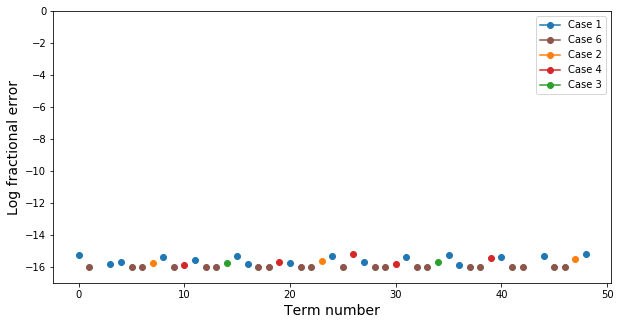

In [5]:
lmax = 6
fig, ax = pl.subplots(1, figsize=(10, 5))
labels = []
b = 0.8
r = 0.3

n = 0
for l in range(lmax + 1):
    for m in range(-l, l + 1):
        # Figure out which case this is
        mu = l - m
        nu = l + m
        if (mu / 2) % 2 == 0:
            case = 1
        elif (mu == 1) and (l % 2 == 0):
            case = 2
        elif (mu == 1) and (l != 1) and (l % 2 != 0):
            case = 3
        elif ((mu - 1) % 2) == 0 and ((mu - 1) // 2 % 2 == 0) and (l != 1):
            case = 4
        elif (mu == 1) and (l == 1):
            # Skip this case, which we treat separately
            n += 1
            continue
        else:
            case = 6
        
        # Compute the P integral using both methods
        P1 = P(l, m, b, r)
        P2 = PKappaDelta(l, m, b, r)
        if P1 == 0 and P2 == 0:
            err = 1e-16
        else:
            err = np.abs((P1 - P2) / P1)

        # Let's plot the error
        label = "Case %d" % case
        if label in labels:
            label = None
        labels.append(label)
        pl.plot(n, np.log10(err), marker='o', color='C%d' % (case - 1), label=label)
        n += 1

ax.set_ylim(-17, 0)
ax.set_xlabel('Term number', fontsize=14)
ax.set_ylabel('Log fractional error', fontsize=14)
ax.legend();

Looks good -- the two expressions are indeed equivalent for all cases.

■